In [1]:
from meeting_corpus_util import *
from SphereDiar import *

Using TensorFlow backend.


### Step 1: Data preprocessing

In this demonstration, "Bro023" from ICSI corpus is used as an example meeting recording. In the first step, SAD is performed and transcription labels are generated. Following code should work with any meeting from AMI or ICSI if the meeting includes ASR based transcriptions.

In [2]:
path = "/your/path/"
audio_path = "/".join([path, "audio"])
tc_asr_path = "/".join([path, "transcriptions", "ASR"])
tc_word_path = "/".join([path, "transcriptions", "words"])

audio_file = "Bro023.interaction.wav"
sig, transcript_lab = transcript_label_generator(audio_file, [audio_path, tc_word_path, tc_asr_path])

### Step 2: System initialization

In this step, SphereDiar is initialized with given SphereSpeaker model. For now, two configurations are available: 
SphereSpeaker and SphereSpeaker 200. The former is depicted in the paper whereas the latter is an updated version with embedding dimension compressed to 200.

In [3]:
model_path = "/".join([path, "models"])
os.chdir(model_path)
SS_model = load_model("SphereSpeaker.hdf")
SD = SphereDiar(SS_model)

### Step 3: Feature extraction and speaker modeling

If you are only interested in creating speaker embeddings, this step is as far as you need to go. The input for extract_features should be a numpy array.

In [4]:
X = SD.extract_features(sig)
F = SD.get_embeddings()

### Step 4: Clustering

Clustering is perfromed using Top Two Silhouettes. By default, $N_{max} = 11$, $\delta = 0.1$ and $R = 25$. The computation can be parallelized if needed by setting num_cores $ > 1$ (not working with notebook though).

In [5]:
SD.cluster(embeddings = F, rounds = 5)

Clustering round:  0
Clustering round:  1
Clustering round:  2
Clustering round:  3
Clustering round:  4


### Step 5: Evaluation

class SphereDiar provides tools for computation of DER and visualization.

In [6]:
f_transcript = np.transpose(frame(transcript_lab, 32000, 8000))
labels = label_generator(f_transcript)

H_theta_perc = 0.65
ref_ind = np.where(labels[:, 1] > H_theta_perc)[0]
ref_labels = labels[ref_ind, 0]

Computing TSNE transform...


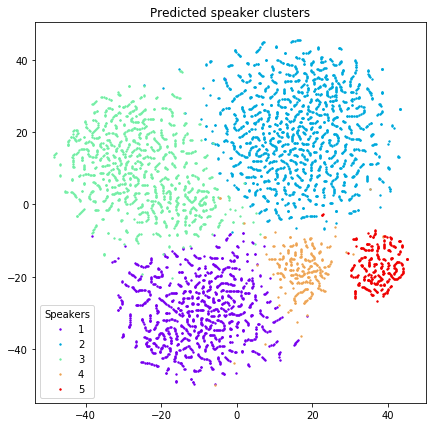

In [7]:
SD.visualize(indices = ref_ind)

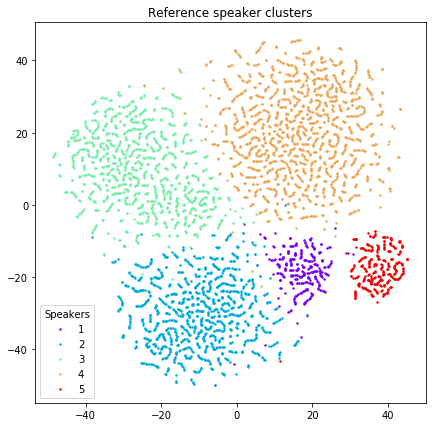

In [8]:
SD.visualize(indices = ref_ind, ref_labels = ref_labels)

It seems that diarization has been a success. What says DER?

In [9]:
SD.calc_DER(ref_labels, ref_ind)

DER (%):  0.45


Nice! 